Football (Semantic Segmentation) 
Dataset source : [Kaggle Link to dataset](https://www.kaggle.com/datasets/sadhliroomyprime/football-semantic-segmentation/data)

100 frames of pixel-perfect semantic segmentation with 11 classes.
- developed for the FIFA 2022 in Qatar 
- 100 frames taken at every 12th frame (match between Real Madrid and Manchester United) 

11 standard classes: `Goal Bar`, `Referee`, `Advertisement`, `Ground`, `Ball`, `Coaches and Officials`, `Audience`, `Goalkeeper A`, `Goalkeeper B`, `Team A`, and `Team B`. 

- used superAnnotate's pixel editor to label and classify images 
- dataset created by ACME AI Ltd. 
- contains COCO for optimized interoperability and visual understanding.



In [45]:
import cv2 
import numpy as np 
import torch
import glob 
import matplotlib.pyplot as plt 

- images are in `jpg` 
- masks are in `png`, with suffix `__fuse`

In [46]:
image_path_list = glob.glob('./images/*.jpg')
mask_path_list = glob.glob('./images/*__fuse.png')

Total number of images

In [47]:
f'total number of images {len(image_path_list)} and respective mask {len(mask_path_list)}'

'total number of images 100 and respective mask 100'

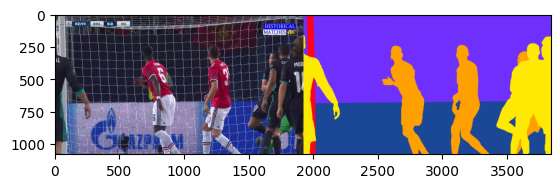

In [114]:
mask = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2RGB) # cv2.COLOR_BGR2HSV) # [:,:,::-1]
image = cv2.cvtColor(cv2.imread(image_path_list[0]), cv2.COLOR_BGR2RGB) # cv2.COLOR_BGR2HSV) # [:, :, ::-1]
plt.imshow(np.hstack([image,mask]) )

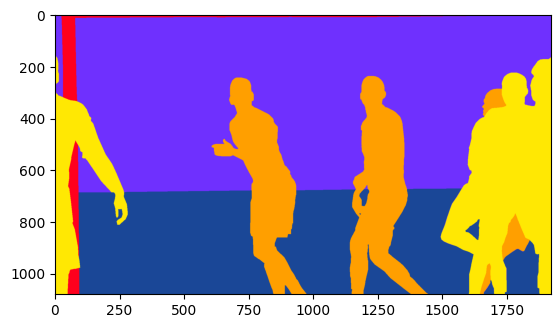

In [115]:
np_image = mask.reshape(-1, 3)
no_of_colors =5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(np.float32(np_image), no_of_colors, bestLabels=None, 
    criteria=criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
seg_data = centers[labels.flatten()] # mapping labels to center points (RGB values)

# reshape data into original
seg_image = seg_data.reshape((image.shape))
plt.imshow(seg_image)

In [116]:
unique_valus = np.unique(seg_data.reshape(-1, 3), axis=0)

In [117]:
unique_valus

array([[ 26,  71, 151],
       [111,  48, 254],
       [255,   0,  29],
       [255, 159,   0],
       [255, 232,   3]], dtype=uint8)

| Class | RGB Value |
| --------- | --------- |
| advertisement | [ 26,  71, 151] |
| Audience | [111,  48, 253] |
| Team A | [255,   0,  29] |





[ 26  71 151]
[111  48 254]
[255   0  29]
[255 159   0]
[255 232   3]


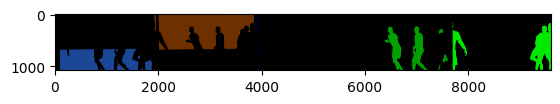

In [156]:
image1 = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2RGB)
from copy import deepcopy
hstack_segments = []
for rgb_pxl in unique_valus:
    print(rgb_pxl)
    copy_image = np.zeros_like(image1)

    # pxl_value = np.array([ 23, 254, 255], dtype=np.uint8)
    tolerance = 5
    
    copy_image[((rgb_pxl - tolerance) < image1[:,:]) & (image1 < (rgb_pxl + tolerance))] = image1[((rgb_pxl - tolerance) < image1 ) & (image1 < (rgb_pxl + tolerance))]
    # copy_image = cv2.cvtColor(copy_image, cv2.COLOR_RGB2GRAY)
    # _, copy_image= cv2.threshold(copy_image, 5, 255, cv2.THRESH_BINARY)

    hstack_segments.append(deepcopy(copy_image))

hstack = np.hstack(hstack_segments)
    # copy_image[image1 == pxl_value] = image1[image1 == pxl_value]
plt.imshow(hstack)

Here, we have seperated the 5 classes with the RGB values 

## Using HSV Value to segment

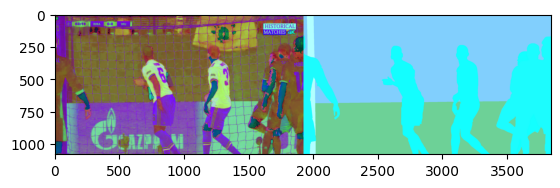

In [132]:
mask = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2HSV) # [:,:,::-1]
image = cv2.cvtColor(cv2.imread(image_path_list[0]), cv2.COLOR_BGR2HSV) # [:, :, ::-1]
plt.imshow(np.hstack([image,mask]) )

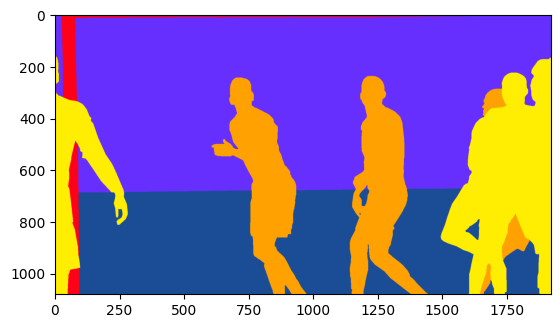

In [88]:
np_image = mask.reshape(-1, 3)
no_of_colors =5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER, 100, 0.85)
retval, labels, centers = cv2.kmeans(np.float32(np_image), no_of_colors, bestLabels=None, 
    criteria=criteria, attempts=10, flags=cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
seg_data = centers[labels.flatten()] # mapping labels to center points (RGB values)

# reshape data into original
seg_image = seg_data.reshape((image.shape))
plt.imshow(cv2.cvtColor(seg_image, cv2.COLOR_HSV2RGB))

In [90]:
unique_valus = np.unique(seg_data.reshape(-1, 3), axis=0)
unique_valus

array([[ 19, 254, 255],
       [ 28, 252, 255],
       [108, 208, 151],
       [128, 207, 254],
       [177, 255, 255]], dtype=uint8)

[ 19 254 255]
[ 28 252 255]
[108 208 151]
[128 207 254]
[177 255 255]


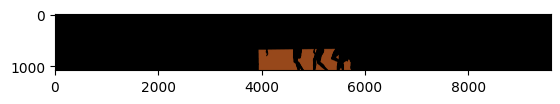

In [97]:
image1 = cv2.cvtColor(cv2.imread(mask_path_list[0]), cv2.COLOR_BGR2HSV)
hstack_segments = []
for pxl_value in unique_valus:
    print(pxl_value)
    copy_image = np.zeros_like(image1)

    # pxl_value = np.array([ 23, 254, 255], dtype=np.uint8)
    tolerance = 2

    copy_image[((pxl_value - tolerance) < image1 ) & (image1 < (pxl_value + tolerance))] = image1[((pxl_value - tolerance) < image1 ) & (image1 < (pxl_value + tolerance))]
    hstack_segments.append(copy_image.copy())

hstack = np.hstack(hstack_segments)
    # copy_image[image1 == pxl_value] = image1[image1 == pxl_value]
plt.imshow(cv2.cvtColor(hstack, cv2.COLOR_HSV2BGR))

Resize
HorizontalFlip
VerticalFlip
ChannelShuffle
ToTensorV2


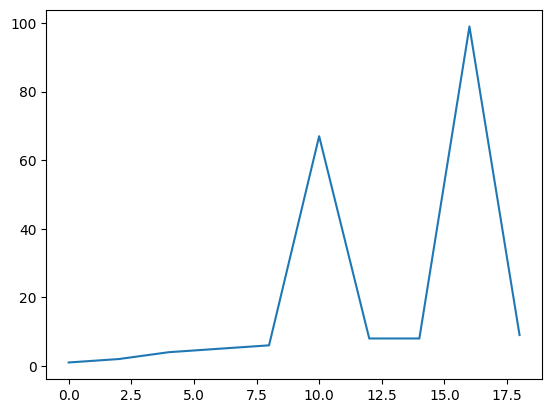

In [5]:
a = [1, 2, 4, 5, 6, 67, 8, 8, 99, 9]
import matplotlib.pyplot as plt 
plt.plot([i for i in range(0, len(a)*2, 2) ], a)